In [1]:
# ------------------------------------------------------------------------
#
# TITLE - paper_fig2_kinematics.ipynb
# AUTHOR - James Lane
# PROJECT - mw-dfs
#
# ------------------------------------------------------------------------
#
# Docstrings and metadata:
'''Make the final DF paper kinematic figures
'''

__author__ = "James Lane"

In [2]:
### Imports

## Basic
import numpy as np, pdb, sys
import dill as pickle
import matplotlib.pyplot as plt
import matplotlib

## galpy
from galpy import potential
from galpy import orbit
ro = 8.178 # Gravity 2019
vo = 220
zo = 0.0208 # Bennet + Bovy 2018

sys.path.append('../../src/')
from mw_dfs import plot as project_plot
from mw_dfs import potential as project_potential

# Setup colors
project_colors = project_plot.colors()
rainbow_cmap = project_colors.colourmap('rainbow')

# Potential
mwpot = potential.MWPotential2014
potential.turn_physical_on(mwpot,ro=ro,vo=vo)

In [3]:
### Notebook setup
%matplotlib inline
plt.style.use('../../src/mpl/project.mplstyle')
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

In [4]:
### Keywords

# Directories
fig_dir = './fig/'
data_dir = '/geir_data/scr/lane/projects/mw-dfs/data/data_Sept_2021/df_samples/'
gaia_apogee_data_dir = '/geir_data/scr/lane/projects/mw-dfs/data/data_Sept_2021/gaia_apogee_processed/'

# Oversampling factors
oversample_factor_halo = 100
oversample_factor_disk = 10

# Potential
phi0 = potential.evaluatePotentials(mwpot,1e12,0).value

# Load data

In [5]:
# Halo
with open(data_dir+'halo_orbits_solar.pkl','rb') as f:
    halo_orbs = pickle.load(f)
##wi
with open(data_dir+'halo_actions_solar.pkl','rb') as f:
    halo_actions = pickle.load(f)
##wi
with open(data_dir+'halo_eELzs_solar.pkl','rb') as f:
    halo_eELzs = pickle.load(f)
##wi
with open(data_dir+'halo_orbits_survey_os_factor'+\
          str(oversample_factor_halo)+'.pkl','rb') as f:
    halo_orbs_apo = pickle.load(f)
##wi
with open(data_dir+'halo_actions_survey_os_factor'+\
          str(oversample_factor_halo)+'.pkl','rb') as f:
    halo_actions_apo = pickle.load(f)
##wi
with open(data_dir+'halo_eELzs_survey_os_factor'+\
          str(oversample_factor_halo)+'.pkl','rb') as f:
    halo_eELzs_apo = pickle.load(f)
##wi

# Disk
with open(data_dir+'disk_orbits_solar.pkl','rb') as f:
    disk_orbs = pickle.load(f)
##wi
with open(data_dir+'disk_actions_solar.pkl','rb') as f:
    disk_actions = pickle.load(f)
##wi
with open(data_dir+'disk_eELzs_solar.pkl','rb') as f:
    disk_eELzs = pickle.load(f)
#wi
with open(data_dir+'disk_orbits_survey_os_factor10.pkl','rb') as f:
    disk_orbs_apo = pickle.load(f)
##wi
with open(data_dir+'disk_actions_survey_os_factor10.pkl','rb') as f:
    disk_actions_apo = pickle.load(f)
##wi
with open(data_dir+'disk_eELzs_survey_os_factor10.pkl','rb') as f:
    disk_eELzs_apo = pickle.load(f)
##wi

In [6]:
len(halo_orbs[0])

100000

In [7]:
# The survey halo and disk samples are oversampled. Undo this for these 
# figures (show only one sample per APOGEE star). Undo np.repeat()

for i in range(len(halo_orbs_apo)):
    halo_orbs_apo[i] = halo_orbs_apo[i][::oversample_factor_halo]
    halo_actions_apo[i] = halo_actions_apo[i][:,::oversample_factor_halo]
    halo_eELzs_apo[i] = halo_eELzs_apo[i][:,::oversample_factor_halo]
###i

for i in range(len(disk_orbs_apo)):
    disk_orbs_apo[i] = disk_orbs_apo[i][::oversample_factor_disk]
    disk_actions_apo[i] = disk_actions_apo[i][:,::oversample_factor_disk]
    disk_eELzs_apo[i] = disk_eELzs_apo[i][:,::oversample_factor_disk]
###i

In [8]:
len(halo_orbs_apo[1])

2198

## Turn into lists for parsing

In [9]:
n_orbs_thin = len(disk_orbs_apo[0])
n_orbs_thick = len(disk_orbs_apo[1])
n_orbs_halo = len(halo_orbs_apo[0])

# Order is: betas [0, -0.5, 0.5, 0.7, 0.9] then thin disk, thick disk
orbs_all = [halo_orbs[0],halo_orbs[1],halo_orbs[2],halo_orbs[3],halo_orbs[4],
            disk_orbs[0],disk_orbs[1]]
eELzs_all = [halo_eELzs[0],halo_eELzs[1],halo_eELzs[2],halo_eELzs[3],halo_eELzs[4],
             disk_eELzs[0],disk_eELzs[1]]
actions_all = [halo_actions[0],halo_actions[1],halo_actions[2],halo_actions[3],halo_actions[4],
               disk_actions[0],disk_actions[1]]

orbs_all_apo = [halo_orbs_apo[0],halo_orbs_apo[1],halo_orbs_apo[2],halo_orbs_apo[3],halo_orbs_apo[4],
                disk_orbs_apo[0],disk_orbs_apo[1]]
eELzs_all_apo = [halo_eELzs_apo[0],halo_eELzs_apo[1],halo_eELzs_apo[2],halo_eELzs_apo[3],halo_eELzs_apo[4],
                 disk_eELzs_apo[0],disk_eELzs_apo[1]]
actions_all_apo = [halo_actions_apo[0],halo_actions_apo[1],halo_actions_apo[2],halo_actions_apo[3],halo_actions_apo[4],
                   disk_actions_apo[0],disk_actions_apo[1]]

isDisk = [False,False,False,False,False,True,True]

In [10]:
print(n_orbs_thin)
print(n_orbs_thick)
print(n_orbs_halo)

124879
23543
2198


## Create the mixture arrays that define what will be plotted

In [11]:
# Mixture array
halo_mixture_arr = np.array([[1.0 ,0   ,0   ,0   ,0  ], # 100% ergodic
                             [0   ,0.1 ,0   ,0   ,0  ], # beta = -0.5
                             [0   ,0   ,0.1 ,0   ,0  ], # beta = 0.5
                             [0   ,0   ,0   ,0.1 ,0  ], # beta = 0.7
                             [0   ,0   ,0   ,0   ,0.1], # beta = 0.9
                             [0   ,0   ,0.5 ,0   ,0.5], # Standard model
                            ])

# Ratio of thin to thick disk stars is ~1/8.5
disk_mixture_arr = np.array([1.0, 1.0/8.5])
disk_mixture_all_arr = np.array([1.0, 1.0])

halo_mixture_arr_apo = np.array([[1.0 ,0   ,0   ,0   ,0   ], # 100% ergodic
                                 [0   ,0.1 ,0   ,0   ,0   ], # beta = -0.5
                                 [0   ,0   ,0.1 ,0   ,0   ], # beta = 0.5
                                 [0   ,0   ,0   ,0.1 ,0   ], # beta = 0.7
                                 [0   ,0   ,0   ,0   ,0.1 ], # beta = 0.9
                                 [0   ,0   ,0.5 ,0   ,0.5 ], # Standard model
                                ])

# For APOGEE just use all thin and thick disc stars

mixture_text = [r'ergodic',
                r'$\beta=-0.5$',
                r'$\beta=0.5$',
                r'$\beta=0.7$',
                r'$\beta=0.9$',
                r'fiducial',
               ]


## Dictionaries to hold properties of specific kinematic spaces

In [12]:
kin_spaces = ['vRvT','Toomre','ELz','JRLz','eLz','AD']

# Some keyword properties
AD_dedge = 1.2

# Limits dictionary. [ [xmin,xmax], [ymin,ymax] ]
lims_dict = {'vRvT':   [[-450,450], [-450,450]],
             'Toomre': [[-450,450], [0,450]],
             'ELz':    [[-4500,4500], [-2.,-0.]],
             'JRLz':   [[-4500,4500], [0,80]],
             'eLz':    [[-4500,4500], [-0.05,1.05]],
             'AD':     [[-AD_dedge,AD_dedge], [-AD_dedge,AD_dedge]]
            }

# Labels dictionary. [xlabel, ylabel]
labels_dict = {'vRvT':   [r'$v_{R}$',r'$v_{T}$'],
               'Toomre': [r'$v_{T}$',r'$(v_{R}^{2}+v_{z}^{2})^{1/2}$'],
               'ELz':    [r'$L_{z}$',r'$(E-\Phi_{0})/10^{5}$'],
               'JRLz':   [r'$L_{z}$',r'$\sqrt{J_{R}}$'],
               'eLz':    [r'$L_{z}$',r'eccentricity'],
               'AD':     [r'$L_{z}/J_{tot}$',r'$(J_{z}-J_{R})/J_\mathrm{tot}$']
               }

# Selection dictionaries [ [xcent,ycent], [xmajor,ymajor] ] or [ [x1,x2], [y1,y2] ]
# Disk-halo separation, ergodic-radial separation
disk_selection_solar_dict = {'vRvT':   [ ['ellipse', [0,180], [220,130] ], ],
                             'Toomre': [ ['ellipse', [180,0], [130,200] ], ],
                             'ELz':    [ ['ellipse', [4750,-2], [5250,1.25] ], ],
                             'JRLz':   [ ['line', [1400,0], [0,30]], ['line', [0,3000], [30,20]], 
                                         ['line', [3000,2000], [20,0]] ],
                             #'JRLz':   [ ['ellipse', [3000,0], [3000,50] ], ] ,
                             'eLz':    [ ['line', [1250,200], [0,0.9] ], ['line', [200,4000], [0.9,0] ] ],
                             'AD':     [ ['ellipse', [1,-1], [0.65,1.1] ], ] 
                             }
disk_selection_survey_dict = {'vRvT':   [ ['ellipse', [0,150], [260,170] ], ],
                              'Toomre': [ ['ellipse', [170,0], [170,260] ], ],
                              'ELz':    [ ['ellipse', [4750,-2], [5000,1.4] ], ],
                              'JRLz':   [ ['line', [0,0], [0,30]], ['line', [0,2000], [30,30]], 
                                          ['line', [2000,5000], [30,10]] ],
                              #'JRLz':   [ ['ellipse', [3000,0], [3000,50] ], ] ,
                              'eLz':    [ ['line', [500,0], [0,1] ], ['line', [0,5000], [1,0] ] ],
                              'AD':     [ ['ellipse', [1,-1], [0.85,1.7] ], ] 
                              }
disk_selection_kws = {'linestyle':'solid', 'linewidth':1, 'facecolor':'None', 
                      'edgecolor':'Black', 'color':'Black', 'label':'Disc'}

# Kinematics Grid Figures

In [13]:
# Keywords for kinematic spaces
kin_spaces = ['vRvT','Toomre','ELz','JRLz','eLz','AD']
n_kin_spaces = len(kin_spaces)
n_mix = len(halo_mixture_arr)
seed = 7703

# Figure sizing
columnwidth = 240./72.27
textwidth = 504.0/72.27

# Plotting keywords
grid_figsize = (18,3.5)
nbins = 40
scatter_s = 0.8
scatter_alpha = 0.1
scatter_zorder = 1
scatter_color = 'DodgerBlue'
contour_alpha = 0.9
contour_zorder = 2
contour_linewidth = 0.5
contour_color = 'Black'
label_fontsize = 9

../../src/mw_dfs/plot.py:72: UserWarning: Warning, absolute=False. Not using absolute mixture array fractions!
  warnings.warn('Warning, absolute=False. Not using absolute mixture array fractions!')



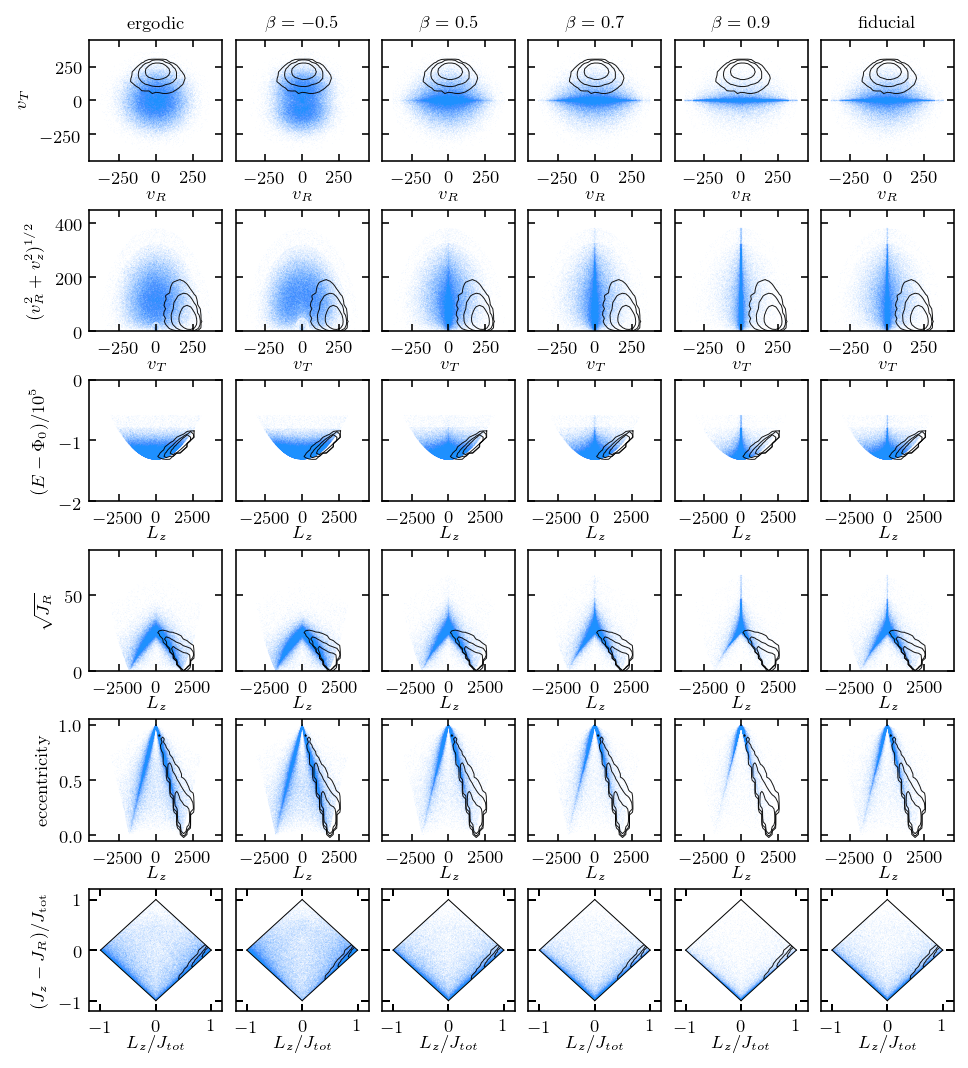

In [14]:
# Specific keywords
this_scatter_alpha = 1*scatter_alpha
this_scatter_s = 0.1*scatter_s

# Figure
fig = plt.figure()
fig.set_size_inches(textwidth,1.1*textwidth)
axs = fig.subplots(nrows=n_kin_spaces, ncols=n_mix)
for i in range( n_kin_spaces ):
    
    # Limits and labels
    xlim,ylim = lims_dict[kin_spaces[i]]
    xlabel,ylabel = labels_dict[kin_spaces[i]]
    xbinsize = (xlim[1]-xlim[0])/nbins
    ybinsize = (ylim[1]-ylim[0])/nbins
    
    # Disk
    xplot_disk ,yplot_disk = project_plot.get_plottable_data( orbs_all[5:], eELzs_all[5:], actions_all[5:], 
        disk_mixture_arr, kin_spaces[i], phi0=phi0, seed=seed)
    
    remove_bad_disk = False
    if remove_bad_disk:
        disk_vR,disk_vT = project_plot.get_plottable_data( orbs_all[5:], eELzs_all[5:], actions_all[5:], 
        disk_mixture_arr, 'vRvT', phi0=phi0, seed=seed)
    
        where_good_disk = np.where( disk_vT > 5 )
        xplot_disk = xplot_disk[where_good_disk]
        yplot_disk = yplot_disk[where_good_disk]
    
    for j in range( n_mix ):
        
        # Plot
        xplot,yplot = project_plot.get_plottable_data( orbs_all[:5], eELzs_all[:5], actions_all[:5], 
            halo_mixture_arr[j], kin_spaces[i], phi0=phi0, seed=seed)
        axs[i,j].scatter(xplot, yplot, s=this_scatter_s, alpha=this_scatter_alpha, 
            facecolor=scatter_color, edgecolor='None', zorder=scatter_zorder, 
            rasterized=True)
        
        # Contours
        hist,xedge,yedge = np.histogram2d(xplot_disk,yplot_disk,bins=nbins,
                                      range=[[xlim[0]-xbinsize,xlim[1]+xbinsize],
                                             [ylim[0]-ybinsize,ylim[1]+ybinsize]])
        xcents = xedge[:-1] + (xlim[1]-xlim[0])/nbins
        ycents = yedge[:-1] + (ylim[1]-ylim[0])/nbins
        xcnt,ycnt = np.meshgrid(xcents,ycents)
        axs[i,j].contour(xcnt, ycnt, hist.T, colors=contour_color, levels=[10,100,1000], zorder=contour_zorder, 
                       alpha=contour_alpha, linewidths=contour_linewidth)
        
        # Decoration
        project_plot.axis_limits_and_labels(axs[i,j], xlim, ylim, xlabel, ylabel, mixture_text[j],
            is_left_edge=j==0, is_top_edge=i==0, label_fontsize=label_fontsize)
        if kin_spaces[i] == 'AD':
            project_plot.add_diamond_boundary(axs[i,j],dedge=AD_dedge)
        ##fi
        #project_plot.add_selection_boundaries(axs[i,j], disk_selection_solar_dict[kin_spaces[i]], 
        #                                       plot_kwargs=disk_selection_kws)
    ###j
###i

fig.tight_layout()
fig.subplots_adjust(hspace=0.4, wspace=0.1)
fig.savefig(fig_dir+'SolarKinematicsGrid.pdf', rasterize=True, dpi=300)

../../src/mw_dfs/plot.py:72: UserWarning: Warning, absolute=False. Not using absolute mixture array fractions!
  warnings.warn('Warning, absolute=False. Not using absolute mixture array fractions!')



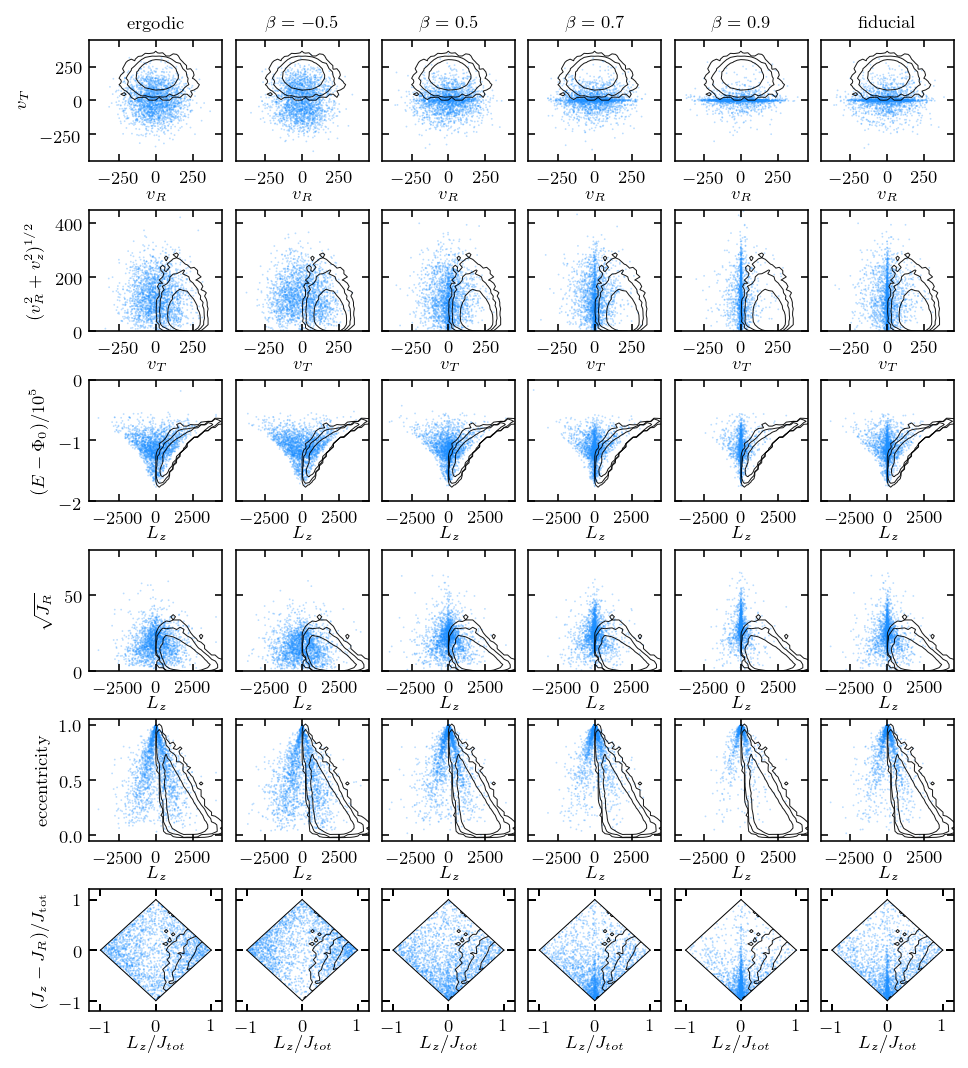

In [23]:
# Specific keywords
this_scatter_alpha = 3*scatter_alpha
this_scatter_s = 1*scatter_s

# Figure
fig = plt.figure()
fig.set_size_inches(textwidth,1.1*textwidth)
axs = fig.subplots(nrows=n_kin_spaces, ncols=n_mix)
for i in range( n_kin_spaces ):
    
    # Limits and labels
    xlim,ylim = lims_dict[kin_spaces[i]]
    xlabel,ylabel = labels_dict[kin_spaces[i]]
    xbinsize = (xlim[1]-xlim[0])/nbins
    ybinsize = (ylim[1]-ylim[0])/nbins
    
    # Disk
    xplot_disk ,yplot_disk = project_plot.get_plottable_data( orbs_all_apo[5:], eELzs_all_apo[5:], 
        actions_all_apo[5:], disk_mixture_all_arr, kin_spaces[i], phi0=phi0, seed=seed, 
        absolute=True)
    
    remove_bad_lowLz_stars = True
    if remove_bad_lowLz_stars:
        vR_disk, vT_disk = project_plot.get_plottable_data( orbs_all_apo[5:], eELzs_all_apo[5:], 
            actions_all_apo[5:], disk_mixture_all_arr, 'vRvT', phi0=phi0, seed=seed, 
            absolute=True)
        # Lowest "natural" stars in the sample at about vT~5.5
        where_bad_lowLz_stars = np.where( vT_disk > 5 )[0]
        xplot_disk = xplot_disk[where_bad_lowLz_stars]
        yplot_disk = yplot_disk[where_bad_lowLz_stars]
    ##fi
    
    for j in range( n_mix ):
        
        # Plot
        xplot,yplot = project_plot.get_plottable_data( orbs_all_apo[:5], 
            eELzs_all_apo[:5], actions_all_apo[:5], 
            halo_mixture_arr_apo[j], kin_spaces[i], phi0=phi0, seed=seed)
        axs[i,j].scatter(xplot, yplot, s=this_scatter_s, alpha=this_scatter_alpha, 
            facecolor=scatter_color, edgecolor='None', zorder=scatter_zorder, 
            rasterized=True)
        
        # Contours
        hist,xedge,yedge = np.histogram2d(xplot_disk,yplot_disk,bins=nbins,
                                      range=[[xlim[0]-xbinsize,xlim[1]+xbinsize],
                                             [ylim[0]-ybinsize,ylim[1]+ybinsize]])
        xcents = xedge[:-1] + (xlim[1]-xlim[0])/nbins
        ycents = yedge[:-1] + (ylim[1]-ylim[0])/nbins
        xcnt,ycnt = np.meshgrid(xcents,ycents)
        axs[i,j].contour(xcnt, ycnt, hist.T, colors=contour_color, levels=[1,10,100], zorder=contour_zorder, 
                       alpha=contour_alpha, linewidths=contour_linewidth)
        
        # Decoration
        project_plot.axis_limits_and_labels(axs[i,j], xlim, ylim, xlabel, ylabel, mixture_text[j],
            is_left_edge=j==0, is_top_edge=i==0, label_fontsize=label_fontsize)
        if kin_spaces[i] == 'AD':
            project_plot.add_diamond_boundary(axs[i,j],dedge=AD_dedge)
        ##fi
        #project_plot.add_selection_boundaries(axs[i,j], disk_selection_survey_dict[kin_spaces[i]], 
        #                                       plot_kwargs=disk_selection_kws)
    ###j
###i

fig.tight_layout()
fig.subplots_adjust(hspace=0.4, wspace=0.1)
fig.savefig(fig_dir+'SurveyKinematicsGrid.pdf', rasterize=True, dpi=300)